In [70]:
! pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
! pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
! pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [75]:
df= pd.read_csv("Tarkshya Customer Payment (Raw Data).csv")

In [76]:
df.head()

,Cust. Code,Customer Name,19.02.2020,time taken,17.03.2020,07.10.2020,04.02.2021,04.06.2021,07.10.2021,02.02.2022,06.04.2022,08.07.2022,28.01.2023
0,1027276,Dr. Chetan Rao,-19,early,>90,>90,>90,>90,>90,>90,>90,>90,31-45
1,1027252,Dr. Janumpally Krishna Chaitan,1,late,>90,>90,>90,>90,>90,0-15,0-15,>90,0-15
2,1027237,M/s.InteractiveDataSystemsLimi,-19,early,0-15,0-15,0-15,0-15,0-15,31-45,0-15,0-15,0-15
3,1027362,M/s.Vasistha Infrastructure Pv,-4,early,>90,0-15,0-15,0-15,0-15,0-15,0-15,0-15,>90
4,1027363,M/s.Vasistha Infrastructure Pv,-4,early,>90,0-15,0-15,0-15,0-15,0-15,0-15,0-15,>90


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cust. Code     148 non-null    int64 
 1   Customer Name  148 non-null    object
 2   19.02.2020     148 non-null    int64 
 3   time taken     148 non-null    object
 4   17.03.2020     148 non-null    object
 5   07.10.2020     148 non-null    object
 6   04.02.2021     146 non-null    object
 7   04.06.2021     146 non-null    object
 8   07.10.2021     142 non-null    object
 9   02.02.2022     142 non-null    object
 10  06.04.2022     144 non-null    object
 11  08.07.2022     145 non-null    object
 12  28.01.2023     104 non-null    object
dtypes: int64(2), object(11)
memory usage: 15.2+ KB


In [78]:
df.replace(['early', 'late','very late'], [0,1,2], inplace=True)

In [79]:
df.drop(['Cust. Code','Customer Name','17.03.2020','07.10.2020','04.02.2021','04.06.2021','07.10.2021','02.02.2022','06.04.2022','08.07.2022','28.01.2023'],axis=1,inplace=True)

In [80]:
df.dtypes

19.02.2020    int64
time taken    int64
dtype: object

In [81]:
X = df.drop(columns='time taken', axis=1)
Y = df['time taken']

In [82]:
X.info

<bound method DataFrame.info of      19.02.2020
0           -19
1             1
2           -19
3            -4
4            -4
..          ...
143         -19
144         -19
145         -19
146         -19
147         -19

[148 rows x 1 columns]>

In [83]:
X.head()

,19.02.2020
0,-19
1,1
2,-19
3,-4
4,-4


In [84]:
Y.info

<bound method Series.info of 0      0
1      1
2      0
3      0
4      0
      ..
143    0
144    0
145    0
146    0
147    0
Name: time taken, Length: 148, dtype: int64>

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (118, 1) (118,)
Test set: (30, 1) (30,)


In [86]:
x_train = x_train.dropna()
y_train = y_train.dropna()

In [87]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [88]:
train_predictions_LinearReg = LinearReg.predict(x_train)
predictions_LinearReg = LinearReg.predict(x_test)

In [89]:
threshold = 0.5
binary_train_predictions = (train_predictions_LinearReg > threshold).astype(int)
binary_test_predictions = (predictions_LinearReg > threshold).astype(int)

In [90]:
train_accuracy = accuracy_score(y_train, binary_train_predictions)
test_accuracy = accuracy_score(y_test, binary_test_predictions)

In [91]:
print(f"Training data accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing data accuracy: {test_accuracy * 100:.2f}%")

Training data accuracy: 66.95%
Testing data accuracy: 83.33%


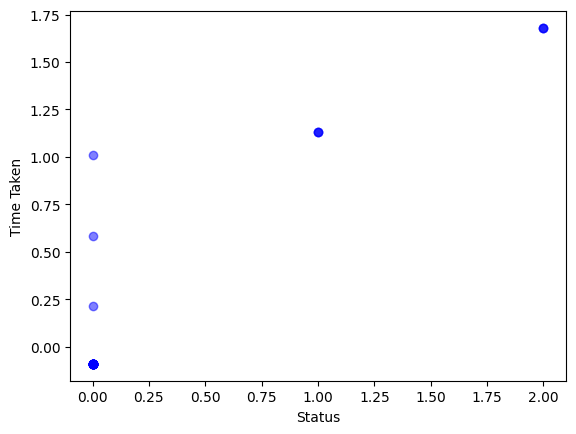

In [92]:
plt.scatter(y_test, predictions_LinearReg, color='blue', alpha=0.5)
plt.xlabel('Status')
plt.ylabel('Time Taken')
plt.show()

In [93]:
print(predictions_LinearReg)

[ 1.13028254 -0.09081823 -0.09081823 -0.09081823 -0.09081823  1.67977789
  0.5807872  -0.09081823 -0.09081823 -0.09081823 -0.09081823 -0.09081823
 -0.09081823 -0.09081823 -0.09081823  1.13028254  1.13028254 -0.09081823
  1.67977789 -0.09081823 -0.09081823  0.21445696  1.67977789 -0.09081823
 -0.09081823  1.00817247 -0.09081823 -0.09081823 -0.09081823 -0.09081823]


In [94]:
print(y_test)

79     1
124    0
24     0
35     0
85     0
59     2
10     0
114    0
140    0
144    0
38     0
21     0
43     0
105    0
39     0
1      1
19     1
83     0
84     2
70     0
116    0
142    0
56     2
55     0
2      0
76     0
146    0
127    0
52     0
82     0
Name: time taken, dtype: int64


In [95]:
LinearRegression_MAE = mean_absolute_error(y_test, predictions_LinearReg)
LinearRegression_MSE = mean_squared_error(y_test, predictions_LinearReg)
LinearRegression_R2 = r2_score(y_test, predictions_LinearReg)

In [96]:
Report = pd.DataFrame({'Model': ['Linear Regression'],
                       'Mean Absolute Error': [LinearRegression_MAE],
                       'Mean Squared Error':[LinearRegression_MSE],
                       'R-Squared Error':[LinearRegression_R2,]})
print(Report)

               Model  Mean Absolute Error  Mean Squared Error  R-Squared Error
0  Linear Regression             0.168737            0.064382          0.84297


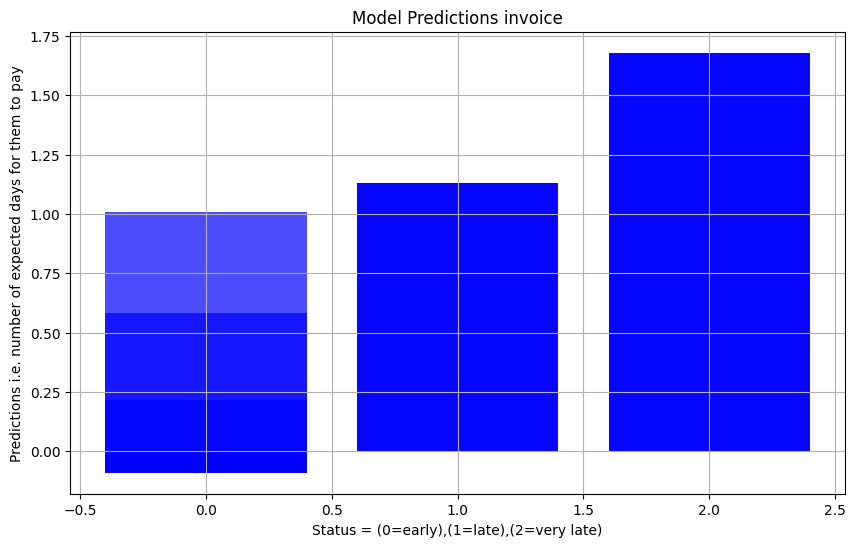

In [98]:
labels = ['early', 'late', 'very late']

plt.figure(figsize=(10, 6))
plt.bar(y_test, predictions_LinearReg, color='blue', alpha=0.7)

plt.xlabel('Status = (0=early),(1=late),(2=very late)')
plt.ylabel('Predictions i.e. number of expected days for them to pay')
plt.title('Model Predictions invoice')

plt.grid(True)
plt.show()